In [4]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
from sklearn.linear_model import Lasso
import matplotlib
from matplotlib import pyplot as plt

# input file path
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//Scenario3_EYDC-9K"

In [5]:
# read input file and index file for training and test set
dataset = np.load(workdir + "//200914_EYDC9K.npz")
ss0 = np.load(workdir + '//200914_EYDC9K_r0_9_1.npz')

In [6]:
# input and index file assign
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [7]:
# training and test dataset assign
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]


In [8]:
# checking the size of dataset
x.shape

(9590, 41505)

In [9]:
# checking the size of training set
training_image_array.shape

(8631, 41505)

In [10]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array


In [11]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8631, 41505) (8631,) (959, 41505) (959,)


In [12]:
# impute nan to zero
train_X = np.nan_to_num(train_X)
test_X = np.nan_to_num(test_X)

In [13]:
# data typing and the number of dataset
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (8631, 41505)
8631 train samples
959 test samples


In [14]:
# model fitting
StartTime8 = datetime.now()
print("StartTime :", StartTime8)

lasso_regressor = Lasso(alpha=0.001)
lasso_regressor.fit(train_X,train_y)

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2020-09-15 12:00:37.992136
EndTime : 2020-09-15 12:02:32.634647


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.275390625, tolerance: 3.4873640537261963
  positive)


In [15]:
predicted_classes = lasso_regressor.predict(test_X)

In [16]:
predicted_value = predicted_classes

In [17]:
# saving predicted ln(IC50)s and ln(IC50)s in the test set
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//EYDC-9K"
c.to_csv(workdir + '//200915_EYDC9K_Lasso_pred_and_val_result.csv', index=False)


In [18]:
# result table
c.head()

,Predicted,Test
0,-3.719768,-4.667942
1,2.005801,2.079442
2,1.631146,2.079442
3,2.378860,2.079442
4,1.987601,2.079442


In [19]:
# the length of result table
predicted_value.shape

(959,)

In [21]:
# model save
import pickle
from sklearn.externals import joblib
joblib.dump(lasso_regressor, workdir + '//200915_EYDC9K_Lasso_model.pkl') 


['D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//EYDC-9K//200915_EYDC9K_Lasso_model.pkl']

In [22]:
# check whether the saved model is working
regr_from_joblib = joblib.load(workdir + '//200915_EYDC9K_Lasso_model.pkl') 
regr_from_joblib.predict(test_X)

array([-3.71976757e+00,  2.00580144e+00,  1.63114572e+00,  2.37885976e+00,
        1.98760128e+00, -2.60624266e+00,  7.04019487e-01,  7.16783583e-01,
       -2.77018976e+00,  1.72667241e+00,  1.23349667e-01, -9.89457130e-01,
        2.29051971e+00,  2.28158474e+00,  1.51152349e+00,  1.91933048e+00,
       -1.42148924e+00, -1.75320411e+00,  1.76907587e+00,  1.87273681e+00,
        9.86844182e-01,  1.72570765e+00, -2.17281818e+00, -1.81083202e+00,
        9.86785293e-01,  9.40685689e-01,  1.62188387e+00,  1.77924109e+00,
        9.92773414e-01,  1.61580622e+00, -1.45408916e+00,  4.66382205e-01,
       -1.42267823e+00,  1.45880747e+00,  1.12273955e+00,  2.35264993e+00,
        1.80860066e+00, -2.11153030e-01,  1.16279912e+00,  2.33498192e+00,
        1.39842355e+00,  2.73343754e+00,  5.09157479e-01,  1.19251156e+00,
        1.27565980e+00,  1.27583635e+00,  2.26948929e+00,  7.75397301e-01,
        2.65336490e+00,  1.93604851e+00, -1.93609905e+00,  1.95172071e+00,
        2.00157595e+00,  

In [23]:
import matplotlib
from matplotlib import pyplot as plt

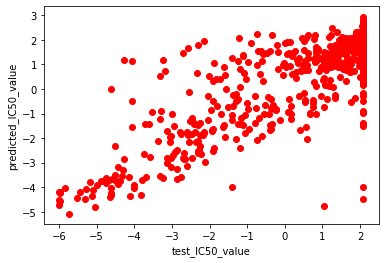

In [24]:
# plotting
plt.scatter(test_label_array,predicted_value,c='red')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//200915_EYDC9K_Lasso_plot.png')

In [25]:
# R-squared value
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.7183919738848703


In [26]:
# Linear regression value (slope)
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.7300961723165429, intercept=0.21403654111813097, rvalue=0.8478292619186233, pvalue=6.699304425816972e-266, stderr=0.014760878132000168)

In [27]:
# RMSE
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.047111343607621
